In [26]:
import csv
import os
import glob
import numpy
from PIL import ImageDraw 
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageFont

def loadResizeImage(img_path, label=None):
    size = (124, 124)

    # Load the image
    img = Image.open(img_path)
    # Keep the original image size
    old_size = img.size

    # Compute resizing ratio
    ratio = float(size[0]) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    # Actually resize it
    img = img.resize(new_size, Image.ANTIALIAS)

    # Paste into centre of black padded image
    new_img = Image.new("RGB", (size[0], size[1]))
    new_img.paste(img, ((size[0] - new_size[0]) // 2, (size[1] - new_size[1]) // 2))
    if label != None:
        draw = ImageDraw.Draw(new_img)
        font = ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial.ttf", 12)
        draw.text((62, 10),label,(255,255,255),font=font)

    # Convert to numpy
    new_img = numpy.array(new_img, dtype=numpy.uint8)

    return new_img

# Function to compose images in a grid
compose = lambda images, horizontal: numpy.concatenate(
    [img / 255 if horizontal == 1 else img for img in images],
    axis=horizontal,
)

def listDirs(dir):
    images = glob.glob(dir + '/*')
    timestamps = [os.path.getctime(path) for path in images]
    indeces = numpy.argsort(timestamps)
    images = [images[idx] for idx in indeces]
    return images, indeces


In [28]:
topDir = '/Users/as16542/Downloads/10m32xl88x2b61zlkkgz3fml17/identification/images/test/*'
dirs = glob.glob(topDir)
for dir in dirs:
    img, indeces = listDirs(dir)
    fig, ax = plt.subplots(1, figsize=((len(img) * 124)/500, 124/500), dpi=500)
    img = [loadResizeImage(img[i], label=str(i)) for i in range(len(img))]
    plt.imshow(compose(img, 1), aspect=1)
    [ax.spines[spine].set_visible(False) for spine in ["top", "right", "bottom", "left"]]
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.axis("tight")
    # print("{} {}".format(dir, len(img)))
    plt.savefig("./tracklets/{}.png".format(dir.split('/')[-1]), dpi=500)
    plt.figure().clear()
    plt.close()
    plt.cla()
    plt.clf()
    # break

/var/folders/7n/w7tvtky53y3csg567pc_xhm80000gq/T/ipykernel_52098/437680338.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure().clear()
/var/folders/7n/w7tvtky53y3csg567pc_xhm80000gq/T/ipykernel_52098/437680338.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=((len(img) * 124)/500, 124/500), dpi=500)


<Figure size 868x124 with 0 Axes>

<Figure size 496x124 with 0 Axes>

<Figure size 3348x124 with 0 Axes>

<Figure size 2852x124 with 0 Axes>

<Figure size 992x124 with 0 Axes>

<Figure size 1116x124 with 0 Axes>

<Figure size 2852x124 with 0 Axes>

<Figure size 4092x124 with 0 Axes>

<Figure size 372x124 with 0 Axes>

<Figure size 992x124 with 0 Axes>

<Figure size 868x124 with 0 Axes>

<Figure size 248x124 with 0 Axes>

<Figure size 1860x124 with 0 Axes>

<Figure size 1116x124 with 0 Axes>

<Figure size 372x124 with 0 Axes>

<Figure size 372x124 with 0 Axes>

<Figure size 620x124 with 0 Axes>

<Figure size 2728x124 with 0 Axes>

<Figure size 372x124 with 0 Axes>

<Figure size 2356x124 with 0 Axes>

<Figure size 620x124 with 0 Axes>

<Figure size 2108x124 with 0 Axes>

<Figure size 620x124 with 0 Axes>

<Figure size 620x124 with 0 Axes>

<Figure size 372x124 with 0 Axes>

<Figure size 868x124 with 0 Axes>

<Figure size 1116x124 with 0 Axes>

<Figure size 1860x124 with 0 Axes>

<Figure size 2356x124 with 0 Axes>

<Figure size 248x124 with 0 Axes>

<Figure size 744x124 with 0 Axes>

<Figure size 868x124 with 0 Axes>

<Figure size 1984x124 with 0 Axes>

<Figure size 620x124 with 0 Axes>

<Figure size 2604x124 with 0 Axes>

<Figure size 1612x124 with 0 Axes>

<Figure size 620x124 with 0 Axes>

<Figure size 372x124 with 0 Axes>

<Figure size 1488x124 with 0 Axes>

<Figure size 4464x124 with 0 Axes>

<Figure size 868x124 with 0 Axes>

<Figure size 248x124 with 0 Axes>

<Figure size 496x124 with 0 Axes>

<Figure size 620x124 with 0 Axes>

<Figure size 2604x124 with 0 Axes>

<Figure size 1612x124 with 0 Axes>

In [45]:
dic = [[(1, 4)]]
p = []
for e in dic:
    l = []
    for d in e:
        if type(d) == tuple:
            l += list(range(d[0], d[1]+1))
        else:
            l.append(d)
    p.append(l)
print(p)

[[1, 2, 3, 4]]


In [54]:
import json
topDIR = '/Users/as16542/Downloads/10m32xl88x2b61zlkkgz3fml17/identification/images/train/'
dataSet = {"test": [], "train": [], "valid": []}
with open('utils/openCows2020_train_tracklet.json') as f:
    files = json.load(f)
    for file in files:
        if file['type'] == 'split':
            directories, indeces = listDirs(topDIR + file['cowID'])
            for split in file['splits']:
                sortedIdx = [directories[idx].replace('/Users/as16542/Downloads/10m32xl88x2b61zlkkgz3fml17/', '') for idx in split]
                dataSet['train'].append({"label": int(file['cowID']), "paths": sortedIdx})
        else:
            directories, indeces = listDirs(topDIR + file['cowID'])
            directories = [director.replace('/Users/as16542/Downloads/10m32xl88x2b61zlkkgz3fml17/', '') for director in directories]
            dataSet['train'].append({"label": int(file['cowID']), "paths": directories})

topDIR = '/Users/as16542/Downloads/10m32xl88x2b61zlkkgz3fml17/identification/images/test/'
with open('utils/openCows2020_test_tracklet.json') as f:
    files = json.load(f)
    for file in files:
        if file['type'] == 'split':
            directories, indeces = listDirs(topDIR + file['cowID'])
            for split in file['splits']:
                sortedIdx = [directories[idx].replace('/Users/as16542/Downloads/10m32xl88x2b61zlkkgz3fml17/', '') for idx in split]
                dataSet['test'].append({"label": int(file['cowID']), "paths": sortedIdx})
        else:
            directories, indeces = listDirs(topDIR + file['cowID'])
            directories = [director.replace('/Users/as16542/Downloads/10m32xl88x2b61zlkkgz3fml17/', '') for director in directories]
            dataSet['test'].append({"label": int(file['cowID']), "paths": directories})


In [55]:
dataSet

{'test': [{'label': 1,
   'paths': ['identification/images/test/001/000015.jpg',
    'identification/images/test/001/000014.jpg',
    'identification/images/test/001/000019.jpg',
    'identification/images/test/001/000011.jpg',
    'identification/images/test/001/000002.jpg']},
  {'label': 1,
   'paths': ['identification/images/test/001/000012.jpg',
    'identification/images/test/001/000018.jpg',
    'identification/images/test/001/000013.jpg',
    'identification/images/test/001/000017.jpg',
    'identification/images/test/001/000008.jpg',
    'identification/images/test/001/000005.jpg',
    'identification/images/test/001/000001.jpg',
    'identification/images/test/001/000006.jpg',
    'identification/images/test/001/000010.jpg',
    'identification/images/test/001/000004.jpg',
    'identification/images/test/001/000016.jpg',
    'identification/images/test/001/000007.jpg']},
  {'label': 1,
   'paths': ['identification/images/test/001/000009.jpg',
    'identification/images/test/00

In [1]:
import csv
import os
import glob
import numpy

def listDirs(dir):
    images = glob.glob(dir + '/*')
    timestamps = [os.path.getctime(path) for path in images]
    indeces = numpy.argsort(timestamps)
    images = [images[idx] for idx in indeces]
    return images

topDir = '/Users/as16542/Downloads/4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identification/Train/RGBDCows2020/Identification/RGB'
dataSet = {"test": [], "train": [], "valid": []}

# Parse the train data
with open('utils/correct.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count > 0 and line_count < 465 and row[6] != 'black':
            label = row[4] if row[4] != '' else row[2]
            if label != '':
                dirs = [dir.replace('/Users/as16542/Downloads/4vnrca7qw1642qlwxjadp87h7/', '') for dir in listDirs(os.path.join(topDir, row[1]))]
                dataSet['train'].append({'label': int(label), 'paths': dirs})
        line_count += 1

# Parse the test data
labels = list(set([item['label'] for item in dataSet["train"]]))
topDir = '/Users/as16542/Downloads/4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identification/Test/'
for label in labels:
    path = os.path.join(topDir, '{:>03}'.format(label))
    dirs = [dir.replace('/Users/as16542/Downloads/4vnrca7qw1642qlwxjadp87h7/', '') for dir in listDirs(path)]
    dataSet["test"].append({'label': int(label), 'paths': dirs})

# Since we omitted black cows we need to hot encode the labels again
labels = list(set([item['label'] for item in dataSet["train"]] + [item['label'] for item in dataSet["test"]]))
hotEncodeMap = {}
for i in range(len(labels)):
    hotEncodeMap[labels[i]] = i

# Now we can use the map the relabel the dataset
for split in dataSet.keys():
    for i in range(len(dataSet[split])):
        dataSet[split][i]['label'] = hotEncodeMap[dataSet[split][i]['label']]

In [95]:
labels = list(set([item['label'] for item in dataSet["train"]] + [item['label'] for item in dataSet["test"]]))
labels

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46]

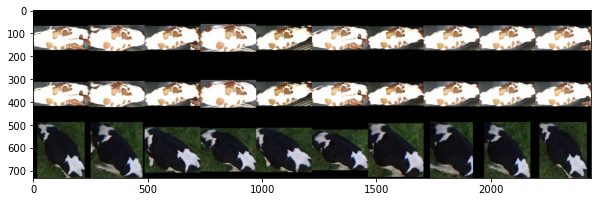

38


In [90]:
from PIL import Image
import matplotlib.pyplot as plt

def loadResizeImage(img_path):
    size = (244, 244)
    # Load the image
    img = Image.open(img_path)

    # Keep the original image size
    old_size = img.size

    # Compute resizing ratio
    ratio = float(size[0]) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    # Actually resize it
    img = img.resize(new_size, Image.ANTIALIAS)

    # Paste into centre of black padded image
    new_img = Image.new("RGB", (size[0], size[1]))
    new_img.paste(img, ((size[0] - new_size[0]) // 2, (size[1] - new_size[1]) // 2))

    # Convert to numpy
    new_img = numpy.array(new_img, dtype=numpy.uint8)

    return new_img

# Function to compose images in a grid
compose = lambda images, horizontal: numpy.concatenate(
    [img / 255 if horizontal == 1 else img for img in images],
    axis=horizontal,
)

topDir = "/Users/as16542/Downloads/10m32xl88x2b61zlkkgz3fml17"
for i in range(38, 39):
    # Sample image from the dataset
    trainSet = None
    testSet = None
    negSet = None
    for j in range(len(dataSet["train"])):
        if dataSet["train"][j]["label"] - 1 == i:
            trainSet = dataSet["train"][j]["paths"]
            break
    for j in range(len(dataSet["test"])):
        if dataSet["test"][j]["label"] - 1 == i:
            testSet = dataSet["test"][j]["paths"]
            break
    for j in range(len(dataSet["test"])):
        if dataSet["test"][j]["label"] - 1 == i+1:
            negSet = dataSet["test"][j]["paths"]
            break
    # Take first 5 images
    trainSet, testSet, negSet = [os.path.join(topDir, path) for path in trainSet[:10]], [
        os.path.join(topDir, path) for path in testSet[:10]
    ], [os.path.join(topDir, path) for path in negSet[:10]]

    trainSet, testSet = [loadResizeImage(path) for path in trainSet], [loadResizeImage(path) for path in testSet]
    negSet = [loadResizeImage(path) for path in negSet]
    composite = compose([compose(trainSet, 1), compose(testSet, 1), compose(negSet, 1)], 0)
    plt.imshow(composite)
    plt.show()
    print(i)
    break

FileNotFoundError: [Errno 2] No such file or directory: '/Users/as16542/Downloads/10m32xl88x2b61zlkkgz3fml17/identification/images/train/*/identification/images/train/001/000142.jpg'

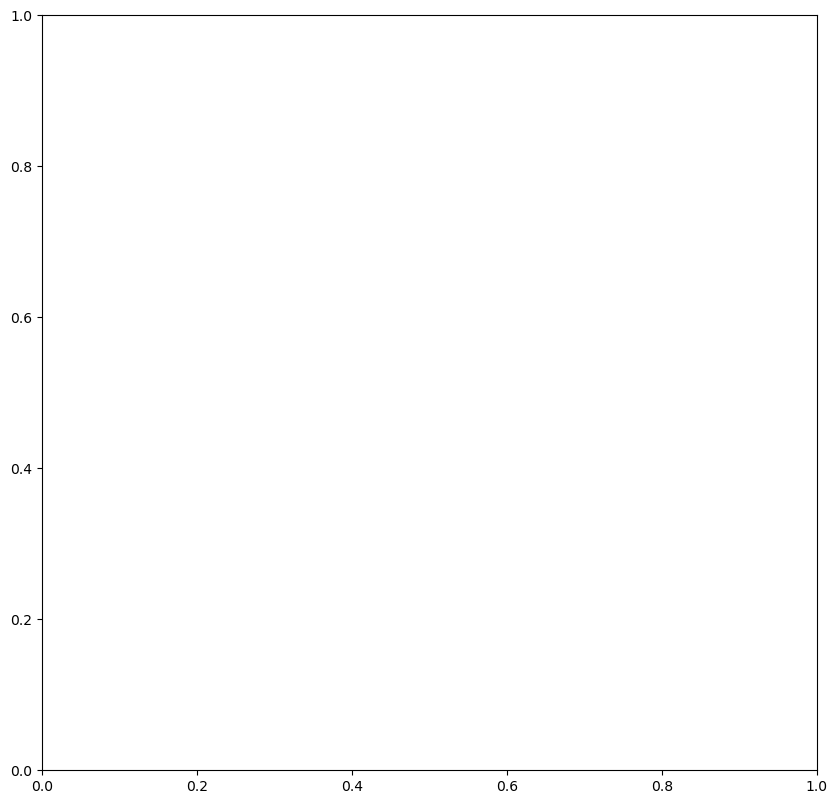

In [63]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(1, dpi=100)
found = []
for item in dataSet['train']:
    if item['label'] == 1:
        found.append(item)

# Take first 5 images
trainSet, testSet = [os.path.join(topDir, path) for path in found[0]['paths'][:5]], [
    os.path.join(topDir, path) for path in found[1]['paths'][:5]
]

trainSet, testSet = [loadResizeImage(path) for path in trainSet], [loadResizeImage(path) for path in testSet]
composite = compose([compose(trainSet, 1), compose(testSet, 1)], 0)
plt.imshow(composite)
plt.show()


In [56]:
import json
# Save
with open('./utils/opencowsTracklets2020.json', 'w') as fp:
    json.dump(dataSet, fp)